# Churn Prediction using Ensemble Techniques

For this project we will be evaluating a dataset composed of human resources data. Our objective is to build a model (or models) that predict whether or not an employee is likely to leave his/her job based on characteristics in the dataset. 

## Data Description

<br>1)  **Age** : Age of the employee </br>
<br>2)  **Attrition** : Whether left organization (1=Left, 0=Not left)</br>
<br>3)  **BusinessTravel** : Whether Travel_Frequently,Travel_Rarely or Non-Travel</br>
<br>4)  **DailyRate** : USD per day</br>
<br>5)  **Department** : Whether Sales,Research & Development or Human Resources</br>
<br>6)  **DistanceFromHome** : In Kilometres</br>
<br>7)  **Education** : 1=Lowest (12th Std), 5 = Highest (PhD)</br>
<br>8)  **EducationField** : Whether Life Sciences,Medical,Marketing,Technical Degree or Other</br>
<br>9)  **EmployeeCount** : (Count =1 ) May be ignored</br>
<br>10) **EmployeeNumber** : Employee Id</br>
<br>11) **EnvironmentSatisfaction** : (1=Lowest, 4=Highest)</br>
<br>12)	**Gender** : Male, Female</br>
<br>13)	**HourlyRate** : Hourly rate of each employee</br>
<br>14)	**JobInvolvement** : (1=Lowest, 4=Highest)</br>
<br>15)	**JobLevel** : Level in Heirarchy(1=Lowest, 4=Highest)</br>
<br>16)	**JobRole**	: Job Designation</br>
<br>17)	**JobSatisfaction** : (1=Lowest, 4=Highest)</br>
<br>18)	**MaritalStatus** : Single, Married, Divorced</br>
<br>19)	**MonthlyIncome** :	Monthly income of every employee</br>
<br>20)	**MonthlyRate**	: Monthly rate of each employee</br>
<br>21)	**NumCompaniesWorked** : Number of Previous Companies worked</br>
<br>22)	**Over18** : Adult (Yes,No)</br>
<br>23)	**OverTime** : Does Overtime (Yes, No)</br>
<br>24)	**PercentSalaryHike** :	Percentage hike in salary</br>
<br>25)	**PerformanceRating** :	Last Performance Rating (1=Lowest,5=Highest)</br>
<br>26)	**RelationshipSatisfaction** : Relationship Satisfaction within company (1=Lowest, 4=Highest)</br>
<br>27)	**StandardHours** :	Standatrd Working hours in a fortnight (2 weeks)</br>
<br>28)	**StockOptionLevel** :	0=No option, 1 = Low, 2 = Medim, 3 = High</br>
<br>29)	**TotalWorkingYears** :	Total Experience</br>
<br>30)	**TrainingTimesLastYear** :	Number of days of Training attended in last year</br>
<br>31)	**WorkLifeBalance** : 1=Lowest, 4 =  Highest</br>
<br>32)	**YearsAtCompany** : Number ofyears with current company</br>
<br>33)	**YearsInCurrentRole** : Number of years of experience in current role</br>
<br>34)	**YearsSinceLastPromotion** : Number of years since last promotion</br>
<br>35)	**YearsWithCurrManager** : Number of years with current manager	</br>

## Import required libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import itertools
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\a\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Loading the dataset 

In [2]:
# Below code is used to load  csv file
df = pd.read_csv('attrition.csv')

Checking the first-five rows of our dataset

In [3]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The below will tell about the number of observations and number of variables in our dataset. 

In [4]:
df.shape

(1470, 35)

Here we observe that there that 35 variables and 1470 observations.

## Data Pre-processing

The below code will tell about the type of variable in our dataset. Type here means whether variable is categorical
or integer

In [5]:
df.dtypes

Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Converting all categorical variable into 'object' type

In [6]:
df['BusinessTravel'] = df['BusinessTravel'].astype('object')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('object')
df['Education'] = df['Education'].astype('object')
df['JobInvolvement'] = df['JobInvolvement'].astype('object')
df['JobLevel'] = df['JobLevel'].astype('object')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('object')
df['PerformanceRating'] = df['PerformanceRating'].astype('object')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype('object')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('object')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('object')

#### Dropping the Insignificant Variable from our dataset 

In [7]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis = 1,inplace = True)

Checking the shape of data after dropping 4 variables

In [8]:
df.shape

(1470, 31)

Earlier the data had 35 variables but now we have 31.

#### Checking missing values

In [9]:
#This code will give the sum of number of missing values in each column
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Checking the mathematical summary of all the 'Numerical' variables using the below code

In [10]:
#This code will give the mathematical summary of all the numerical variable
df.describe()

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Checking the summary of all the categorical variable using ther below code

In [11]:
#This code will give the summary of all the categorical variable
df.describe(include = 'object')

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,5,6,4,2,4,5,9,4,3,2,2,4,4,4
top,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,No,3,3,0,3
freq,1043,961,572,606,453,882,868,543,326,459,673,1054,1244,459,631,893


#### Splitting Target Variable

In [12]:
#This code is use to select all the variables(columns) excluding attrition(target column)
predictor = df.iloc[:,df.columns != 'Attrition']
#This code is use to select the Attrition column(target variable)
target = df.iloc[:,df.columns == 'Attrition']

Checking the shape of our attrition dataset

In [13]:
#This code will give the shape of our dataset.Here, we have 1470 observations and 31 variables
df.shape

(1470, 31)

Splitting our dataset into Numerical and Categorical Variable

In [14]:
# Splitting DataFrame into numerical and categorical

#This code is use to select the variable name of all columns which is of type 'object'
cat_var = [col for col in predictor.columns.values if predictor[col].dtype == 'object']
#This code will create a dataframe of  the variable name which is of type 'object'
df_cat = predictor[cat_var]
#This code will create a dataframe of all the columns which is of type 'integer'
df_num = predictor.drop(cat_var,axis = 1)

#### Dummy encoding

Performing 'Dummy Coding' for all the categorical variable

In [15]:
# Dummy Coding for Categorical Variables

#This code will perform dummy encoding for categorical dataframe
df_cat_dummies = pd.get_dummies(df_cat,drop_first = True)
# This code will tell about the number of numerical variable
print('Numerical Features: ', str(len(df_num.columns)))
# This code will tell about the number of dummy variable
print('Categorical: ', str(len(df_cat_dummies.columns)))

Numerical Features:  14
Categorical:  48


Merging of Numercal and Categorical dataframe after dummy coding

In [16]:
# Merging of Numerical and Dummy Variable
data = pd.concat([df_num,df_cat_dummies],axis = 1)

Checking the shape of our dataframe after merging of numerical and dummy variable

In [17]:
#This code is use to check the shape of our dataframe after performing dummy coding .
# Here, we have 1470 observations and 62 variables 
data.shape

(1470, 62)

Checking first-five rows of our dataframe after merging

In [18]:
# This code will give the first-five row of our dataframe 'data'
data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,5993,19479,8,11,8,0,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,5130,24907,1,23,10,3,...,1,0,0,1,1,0,0,0,1,0
2,37,1373,2,92,2090,2396,6,15,7,3,...,0,1,0,0,0,0,0,0,1,0
3,33,1392,3,56,2909,23159,1,11,8,3,...,0,0,1,0,0,0,0,0,1,0
4,27,591,2,40,3468,16632,9,12,6,3,...,0,0,0,1,1,0,0,0,1,0


## Splitting Dataset into Train and Test


In [19]:
from sklearn.model_selection import train_test_split
#This code will perform train,test on our independent and dependent variable
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.30,random_state = 1)
#This code will give the shape of x_train data. 
#shape : (x,y) ,where x is number of observations and y is number of variable
print('x_train :' ,x_train.shape)
#This code will give the shape of x_test data
print('x_test :' ,x_test.shape)
#This code will give the shape of y_train data 
print('y_train :' ,y_train.shape)
#This code will give the shape of y_test data
print('y_test :' ,y_test.shape)

x_train : (1029, 62)
x_test : (441, 62)
y_train : (1029, 1)
y_test : (441, 1)


Checking first-five rows of our dataset after splitting the data into train and test

In [20]:
#This code will give first-five row of our x_train data
x_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
99,44,489,23,67,2042,25043,4,12,17,3,...,0,0,1,0,1,0,0,0,0,1
785,40,1492,20,61,10322,26542,4,20,14,6,...,1,0,0,1,1,0,0,0,1,0
918,51,237,9,83,19847,19196,4,24,31,5,...,1,0,0,0,1,0,0,1,0,0
1335,39,835,19,41,3902,5141,8,14,7,2,...,0,1,0,0,0,0,1,0,1,0
1182,36,894,1,33,4374,15411,0,15,4,6,...,0,0,1,0,0,0,0,0,1,0


## Decision Tree Classifier

In [21]:
# Importing Decision Tree Classifier library from sklearn
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf_DT = DecisionTreeClassifier(criterion='entropy', random_state=1)

Building a Decision Tree Classifer and performing predictions on test data.

In [22]:
# Train Model
model_DT = clf_DT.fit(x_train,y_train)

# Predicting the model
y_pred = model_DT.predict(x_test)

Plotting the ROC Curve for Decision Tree Classifier

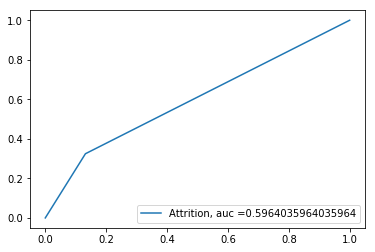

In [23]:
# Calculate the predicted probability on the test data 
y_pred_proba = model_DT.predict_proba(x_test)[::,1]
# Creating the roc curve on y_test and y_pred_proba
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
# Find area under roc curve 
auc = metrics.roc_auc_score(y_test,y_pred_proba)
# Using plt.plot ,plot auc score on the label
plt.plot(fpr,tpr,label = 'Attrition, auc ='+str(auc))
#Print out label on the graph and loc value 
plt.legend(loc = 4)
#Showing the plot
plt.show()


#### Confusion Matrix 

In [24]:
from sklearn.metrics import confusion_matrix
#This code will create confusion matrix of predicted and actual values
confusion_matrix(y_pred, y_test)

array([[316,  52],
       [ 48,  25]], dtype=int64)

#### Results

Displaying results associated with Decision Tree Model in a tabular format

In [25]:
# Create a list of parameter 
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
# Create a dataframe of the above list
models_report = pd.DataFrame(columns = cols)
# Create a result associated with the list mentioned above.
tmp2 = pd.Series({'Model': " Decision Tree with Entropy ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})
# Below code will append the above tmp2 series in model_report dataframe
model_dt1_report = models_report.append(tmp2, ignore_index = True)
model_dt1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision Tree with Entropy,0.596404,0.342466,0.324675,0.773243


#### Grid SearchCV

In [26]:
# Set the parameters for grid search
grid_search_parameters = {'criterion':['gini','entropy'],
                          'min_samples_split':[2],
                          'max_depth': [None,2, 3],
                         'min_samples_leaf': [1,5],
                          'max_leaf_nodes':[None],
                         }

Building a train model after doing Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

# Create an instance of Decision Tree Classifier()
classifier = DecisionTreeClassifier()

# Use GridSearchCV() , pass the values you have set for grid search
model_DT_Grid = GridSearchCV(classifier, grid_search_parameters,cv = 10)
#Creating a train model using Grid Search
model_DT_Grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2], 'max_depth': [None, 2, 3], 'min_samples_leaf': [1, 5], 'max_leaf_nodes': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Displaying the important parameters after doing grid search

In [28]:
model_DT_Grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Performing predictions on the trained model after doing Grid Search

In [29]:
test_pred = model_DT_Grid.predict(x_test)

Checking the accuracy of the model after doing Grid Search

In [30]:
cc = accuracy_score(y_test,test_pred)
print("Accuracy is",cc)

Accuracy is 0.8276643990929705


In [31]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[356,   8],
       [ 68,   9]], dtype=int64)

#### Building Decision Tree After Getting best parameter from grid search

In [32]:
### Building Model after doing Grid Search
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(criterion='entropy', max_depth= 3, max_leaf_nodes= None, 
                                min_samples_leaf= 1,min_samples_split=2)

Building a Decision Tree model after getting important parameters from Grid Search

In [33]:
# Train Model
model_DT = clf_DT.fit(x_train,y_train)

# Predicting the model
y_pred = model_DT.predict(x_test)

#### Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[356,  68],
       [  8,   9]], dtype=int64)

#### Results

Displaying results associated with Decision Tree Model using Entropy Criteria in a tabular format

In [35]:
# Create a list of parameter 
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
# Create a dataframe of the above list
models_report = pd.DataFrame(columns = cols)
# Create a result associated with the list mentioned above.
tmp2 = pd.Series({'Model': " Decision Tree with GridSearch(Entropy) ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_dt1_report_grid = models_report.append(tmp2, ignore_index = True)
model_dt1_report_grid


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision Tree with GridSearch(Entropy),0.547453,0.529412,0.116883,0.827664


## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

Building a Random Forest Classifier and performing predictions on test data

In [45]:
#Create random tree classifier object
rf = RandomForestClassifier(n_estimators=10)

# Train Model
model_rf = rf.fit(x_train,y_train)

# Predicting the model
y_pred = model_rf.predict(x_test)

ROC Curve of Random Forest Classifer

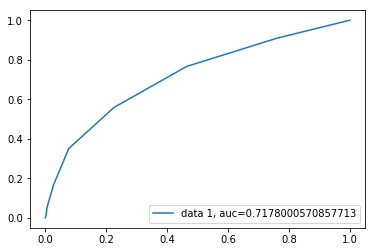

In [46]:
# Calculate the predicted probability on the test data 
y_pred_proba = model_rf.predict_proba(x_test)[::,1]
# Creating the roc curve on y_test and y_pred_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# Find area under roc curve 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# Using plt.plot ,plot auc score on the label
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#Print out label on the graph and loc value 
plt.legend(loc=4)
#Showing the plot
plt.show()


#### Results

Displaying the results associted with Random Forest Classifier Model in a tabular format

In [47]:
# Create a result associated with the list mentioned above.
tmp3 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_rf1_report = models_report.append(tmp3, ignore_index = True)
model_rf1_report


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Random Forest Classifier,0.523227,0.666667,0.051948,0.829932


#### Grid Search Random Forest

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

In [48]:
# Set the parameters for grid search

grid_search_parameters = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

Performing Grid Search on Random Forest Classifier

In [49]:
from sklearn.model_selection import GridSearchCV

# Create an instance of Random Forest Classifier()
classifier = RandomForestClassifier()

# Use GridSearchCV() , pass the values you have set for grid search
model_RF_Grid = GridSearchCV(classifier, grid_search_parameters,cv = 10)
#Create a train model after performing grid search
model_RF_Grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Getting the best parameter for Random Forest Classifier using Grid Search

In [57]:
model_RF_Grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
model_RF_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

Performing predictions of the trained model using test data

In [51]:
test_pred = model_RF_Grid.predict(x_test)

Checking the accuracy of our model after doing Grid Search

In [52]:
# After doing grid search , the accuracy of our random forest model changed from 82.5 to 83.6

cc = accuracy_score(y_test,test_pred)
print("Accuracy is",cc)

Accuracy is 0.8367346938775511


### Building a Random Forest Classifier model using Grid Search CV

In [53]:
#Create random tree classifier object
rf = RandomForestClassifier(criterion = 'entropy',max_depth=8,max_features='sqrt',n_estimators=500)

# Train Model
model_grid = rf.fit(x_train,y_train)

# Predicting the model
y_pred = model_grid.predict(x_test)

#### Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[361,  69],
       [  3,   8]], dtype=int64)

#### Results

Displaying the results associated with our Random Forest Classifier Model using Grid Search  in a tabular format

In [55]:
# Create a result associated with the list mentioned above.
tmp2 = pd.Series({'Model': " Random Forest with Grid Search ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_rf1_report_gs = models_report.append(tmp2, ignore_index = True)
model_rf1_report_gs

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Random Forest with Grid Search,0.547827,0.727273,0.103896,0.836735


## Bagging

BaggingClassifier is a Sci-kit learn's implementation of bagging ensemble which accepts as an input the designation of a base classifier which the bagging ensemble will replicate n times.These methods are used as a way to reduce the variance of a base estimator, by introducing randomization into its construction procedure and then making an ensemble out of it.

As they provide a way to reduce overfitting, bagging methods work best with strong and complex models, in contrast with boosting methods which usually work best with weak models.

In [58]:
best_model = model_RF_Grid.best_estimator_
# Create a training model
best_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Buiding a train model after doing bagging on the best model

In [59]:
from sklearn.ensemble import BaggingClassifier
#Creating an object instance of Bagging Classifier
bagging = BaggingClassifier(best_model, random_state=1)
# Creating a train model after performing bagging
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

#### ROC Curve for Bagging

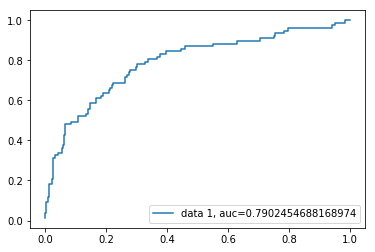

In [60]:
# Calculate the predicted probability on the test data 
y_pred_proba = bagging.predict_proba(x_test)[::,1]
# Creating the roc curve on y_test and y_pred_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# Find area under roc curve 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# Using plt.plot ,plot auc score on the label
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#Print out label on the graph and loc value 
plt.legend(loc=4)
#Showing the plot
plt.show()


#### Results

Displaying the results associated with the model using Random Forest with Bagging Classifier

In [61]:
test_pred_bag = bagging.predict(x_test)

# Create a result associated with the list mentioned above.
tmp2 = pd.Series({'Model': " Random Forest with BaggingClassifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag)})

# Below code will append the above tmp2 series in model_report dataframe
model_bag_report = models_report.append(tmp2, ignore_index = True)
model_bag_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Random Forest with BaggingClassifier,0.542707,0.777778,0.090909,0.836735


## Boosting - AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [62]:
#Creating an object instance of AdaBoost Classifier
adb = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)
#Creating a train model
mod_boost = adb.fit(x_train,y_train)

Performing prediction on the test data after performing boosting

In [63]:
#Performing prediction on Adaboost Classifier
mod_pred = adb.predict(x_test)

Checking the accuracy of the trained model 

In [64]:
adb.score(x_test,y_test)

0.8594104308390023

#### ROC Curve

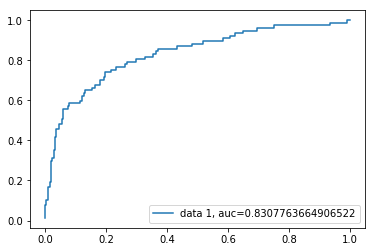

In [65]:
# Calculate the predicted probability on the test data 
y_pred_proba = mod_boost.predict_proba(x_test)[::,1]
# Creating the roc curve on y_test and y_pred_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# Find area under roc curve 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# Using plt.plot ,plot auc score on the label
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#Print out label on the graph and loc value 
plt.legend(loc=4)
#Showing the plot
plt.show()


#### Results

Displaying the result associated with the model using Random Forest with Adaboost Classifier

In [66]:
# Create a list of parameter 
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
# Create a dataframe of the above list
models_report = pd.DataFrame(columns = cols)

# Create a result associated with the list mentioned above.
tmp1 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test,mod_pred),
                 'Precision Score': metrics.precision_score(y_test,mod_pred),
                 'Recall Score': metrics.recall_score(y_test,mod_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test,mod_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_adb_report = models_report.append(tmp1, ignore_index = True)
model_adb_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Adaboost Classifier,0.643482,0.727273,0.311688,0.85941


### XGBoost Classifier

In [68]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

import itertools

Building a train model on XGBoost Classifier

In [69]:
# Create an object instance of XGB Classifier
xg_model = XGBClassifier()

# Create a train model
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

Performing prediction on our trained model of XGBoost using test data

In [70]:
# Doing prediction on the test data
test_pred = xg_model.predict(x_test)

Checking the accuracy of our trained model

In [71]:
# Checking the accuracy of our XGBoost Classifer
test_accuracy = accuracy_score(y_test,test_pred)
print("Test Accuracy: %.2f%%" %(test_accuracy*100))

Test Accuracy: 85.49%


#### Results

Displaying the results associated with the model using XGBoost Classifier

In [72]:
# Create a result associated with the list mentioned above.
tmp1 = pd.Series({'Model': " XGBoost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test,test_pred),
                 'Precision Score': metrics.precision_score(y_test,test_pred),
                 'Recall Score': metrics.recall_score(y_test,test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test,test_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_xgb = models_report.append(tmp1, ignore_index = True)
model_xgb

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,XGBoost Classifier,0.604895,0.809524,0.220779,0.854875


#### Comparison of Models based on Accuracy and maximum features

In [39]:
# Comparison of Models of Different Algorithm  based on criterion and max_features

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
model_rf = pd.DataFrame(columns = cols)
model_rf = model_rf.append([model_dt1_report,model_dt1_report_grid,model_rf1_report,
                            model_rf1_report_gs,model_bag_report,
                            model_adb_report,model_xgb], ignore_index = True)
model_rf.head(9)

NameError: name 'model_bag_report' is not defined

From the above oservations , it is clear that Adaboost Classifier and XGBoost Classifer gives optimum results. This means that these models are able to correctly classify more than 85% obesrvations of our dataset.